# insights

In [47]:
import pandas as pd

df = pd.read_csv(r'D:\final breast_cancer\data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [48]:
def describe_df(dataframe):
    print("Dataframe Shape:", dataframe.shape)
    print("\nDataframe Info:")
    print(dataframe.info())
    print("\nDataframe Description:")
    print(dataframe.describe())
    print("\ndescriptive statistics for categorical columns:")
    print(dataframe.describe(include=['O']))
    print("\nMissing Values in Each Column:")
    print(dataframe.isnull().mean() * 100)
    print("\nduplicated Rows:", dataframe.duplicated().mean() * 100)

In [49]:
describe_df(df)

Dataframe Shape: (569, 33)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-nul

In [50]:
# df_c = df.copy()

In [51]:
df.drop(columns=['id', 'Unnamed: 32'], axis=1, inplace=True)

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['diagnosis'] = le.fit_transform(df['diagnosis'])

# remove high corr

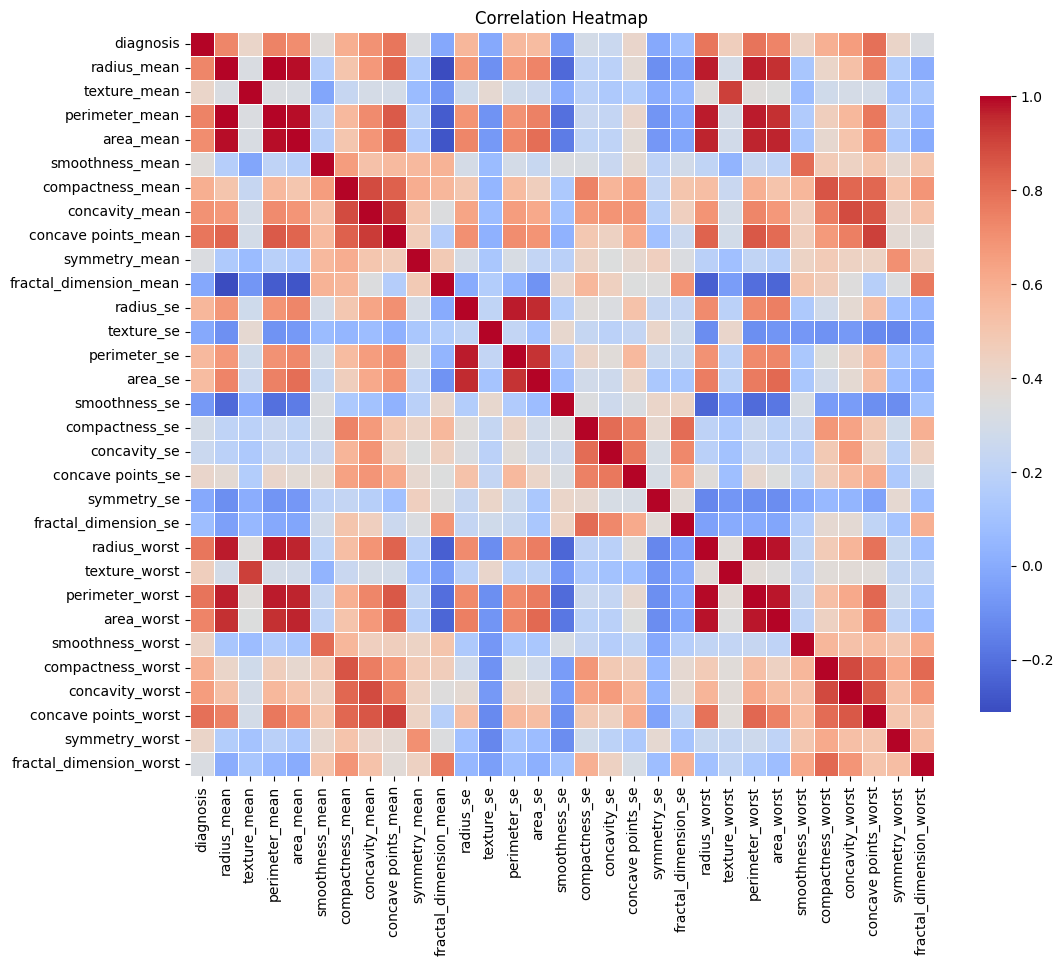

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f", square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [54]:
import numpy as np
high_corr = corr.abs()

high_corr_pairs = np.where(high_corr > 0.9)
high_corr_features = set()

for i, j in zip(*high_corr_pairs):
    if i != j:
        high_corr_features.add(df.columns[i])
        high_corr_features.add(df.columns[j])

high_corr_features = list(high_corr_features)
print("Columns with high correlation:", high_corr_features)
print("Number of columns to drop:", len(high_corr_features))

Columns with high correlation: ['concavity_mean', 'texture_worst', 'area_se', 'radius_se', 'perimeter_worst', 'perimeter_se', 'area_worst', 'radius_worst', 'perimeter_mean', 'texture_mean', 'concave points_worst', 'area_mean', 'concave points_mean', 'radius_mean']
Number of columns to drop: 14


In [55]:
import numpy as np

upper = corr.where(
    np.triu(np.ones(corr.shape), k=1).astype(bool)
)

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Columns with high correlation:", to_drop)
print("Number of columns to drop:", len(to_drop))

Columns with high correlation: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
Number of columns to drop: 10


In [56]:
from sklearn.feature_selection import f_classif
import numpy as np

target = 'diagnosis'

X = df[high_corr_features]
y = df[target].astype('category').cat.codes  # نحول target لأرقام

f_scores, p_values = f_classif(X, y)

feature_importance = pd.DataFrame({
    'Feature': high_corr_features,
    'F-Score': f_scores,
    'p-value': p_values
}).sort_values(by='F-Score', ascending=False)

print(feature_importance)


                 Feature     F-Score        p-value
10  concave points_worst  964.385393  1.969100e-124
4        perimeter_worst  897.944219  5.771397e-119
12   concave points_mean  861.676020  7.101150e-116
7           radius_worst  860.781707  8.482292e-116
8         perimeter_mean  697.235272  8.436251e-101
6             area_worst  661.600206   2.828848e-97
13           radius_mean  646.981021   8.465941e-96
11             area_mean  573.060747   4.734564e-88
0         concavity_mean  533.793126   9.966556e-84
3              radius_se  268.840327   9.738949e-50
5           perimeter_se  253.897392   1.651905e-47
2                area_se  243.651586   5.895521e-46
1          texture_worst  149.596905   1.078057e-30
9           texture_mean  118.096059   4.058636e-25


In [57]:
high_corr_features = ['radius_mean',
 'perimeter_mean',
 'perimeter_worst',
 'perimeter_se',
 'concavity_worst',
 'compactness_mean',
 'texture_mean',
 'texture_se',
 'fractal_dimension_mean']


df_clean = df.drop(columns=high_corr_features, inplace=False)
df_clean.shape

(569, 22)

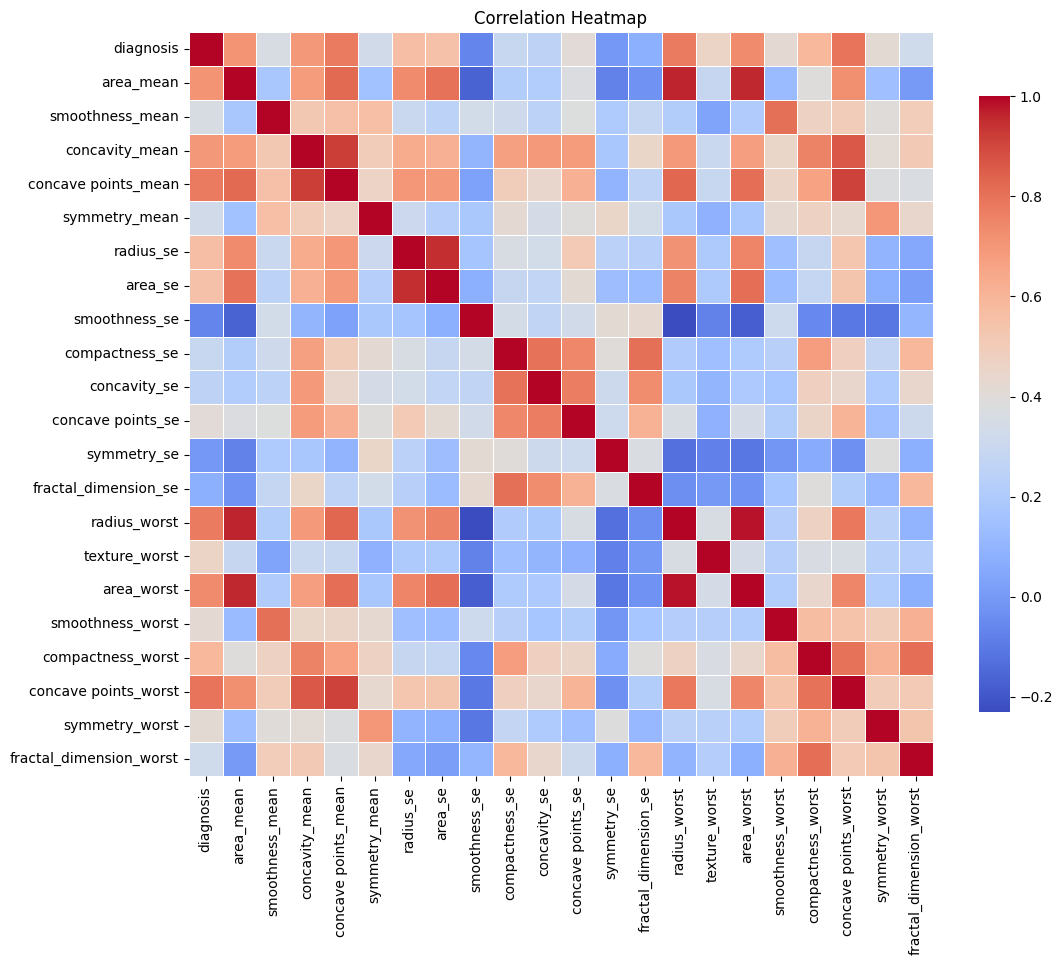

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df_clean = df_clean.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr_df_clean, cmap="coolwarm", annot=False, fmt=".2f", square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [59]:
high_corr = corr_df_clean.abs()

high_corr_pairs = np.where(high_corr > 0.9)
high_corr_features = set()

for i, j in zip(*high_corr_pairs):
    if i != j:
        high_corr_features.add(df_clean.columns[i])
        high_corr_features.add(df_clean.columns[j])

high_corr_features = list(high_corr_features)
print("Columns with high correlation:", high_corr_features)
print("Number of columns to drop:", len(high_corr_features))

Columns with high correlation: ['concavity_mean', 'area_se', 'radius_se', 'area_worst', 'radius_worst', 'concave points_worst', 'area_mean', 'concave points_mean']
Number of columns to drop: 8


In [60]:
columns_to_drop = ['area_worst', 'area_mean', 'radius_se', 'area_se', 'concave points_mean', 'concavity_mean']
df_clean_2 = df_clean.drop(columns=columns_to_drop, inplace=False)
df_clean_2.shape

(569, 16)

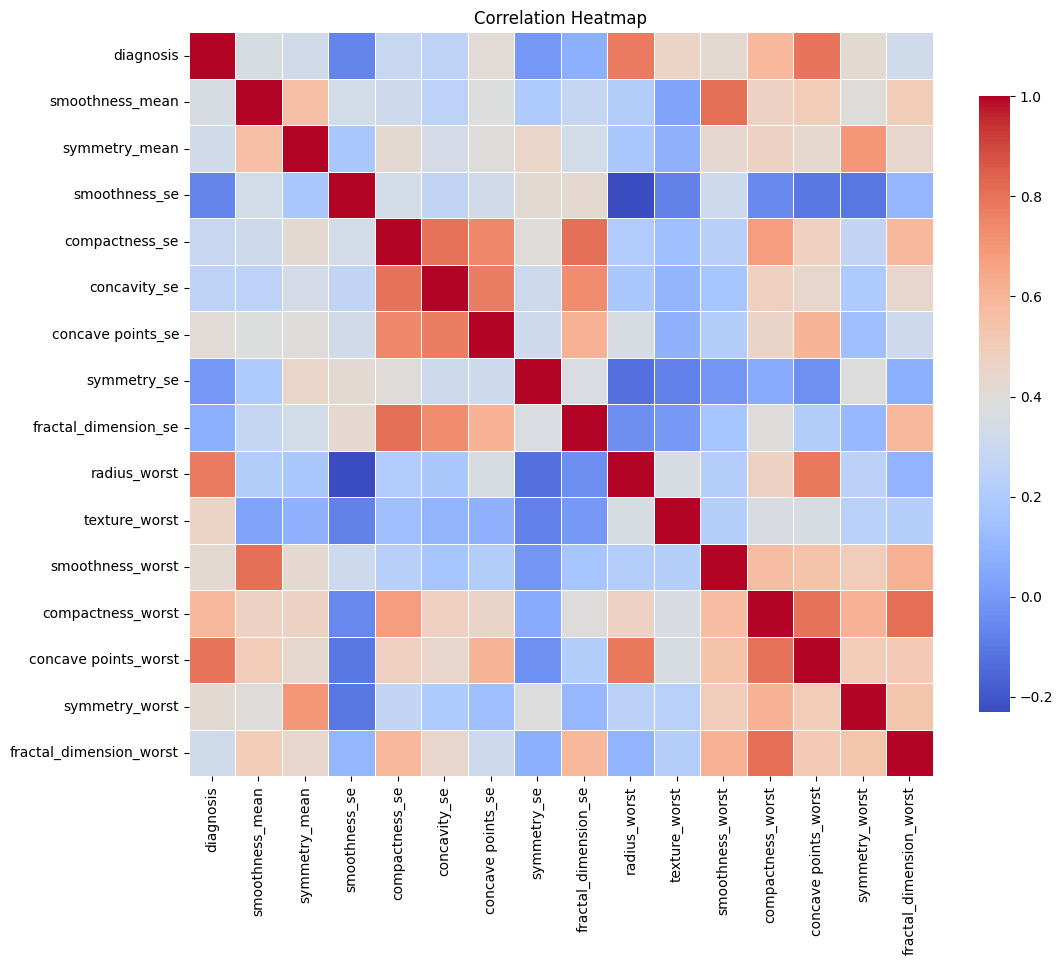

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df_clean_2 = df_clean_2.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr_df_clean_2, cmap="coolwarm", annot=False, fmt=".2f", square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [62]:
high_corr = corr_df_clean_2.abs()

high_corr_pairs = np.where(high_corr > 0.9)
high_corr_features = set()

for i, j in zip(*high_corr_pairs):
    if i != j:
        high_corr_features.add(df_clean_2.columns[i])
        high_corr_features.add(df_clean_2.columns[j])

high_corr_features = list(high_corr_features)
print("Columns with high correlation:", high_corr_features)
print("Number of columns to drop:", len(high_corr_features))

Columns with high correlation: []
Number of columns to drop: 0


# some analysis

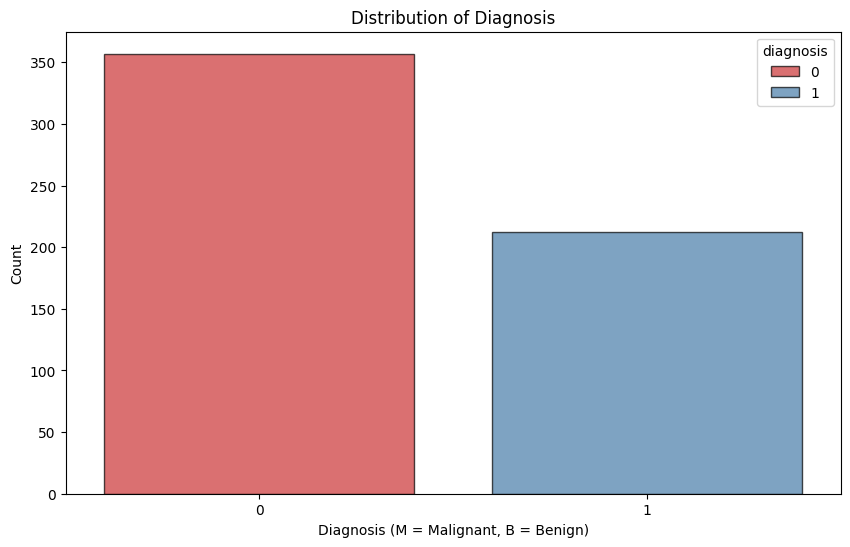

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=df, palette='Set1', order=df['diagnosis'].value_counts().index, edgecolor='black', alpha=0.7, hue='diagnosis')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Count')
plt.show()

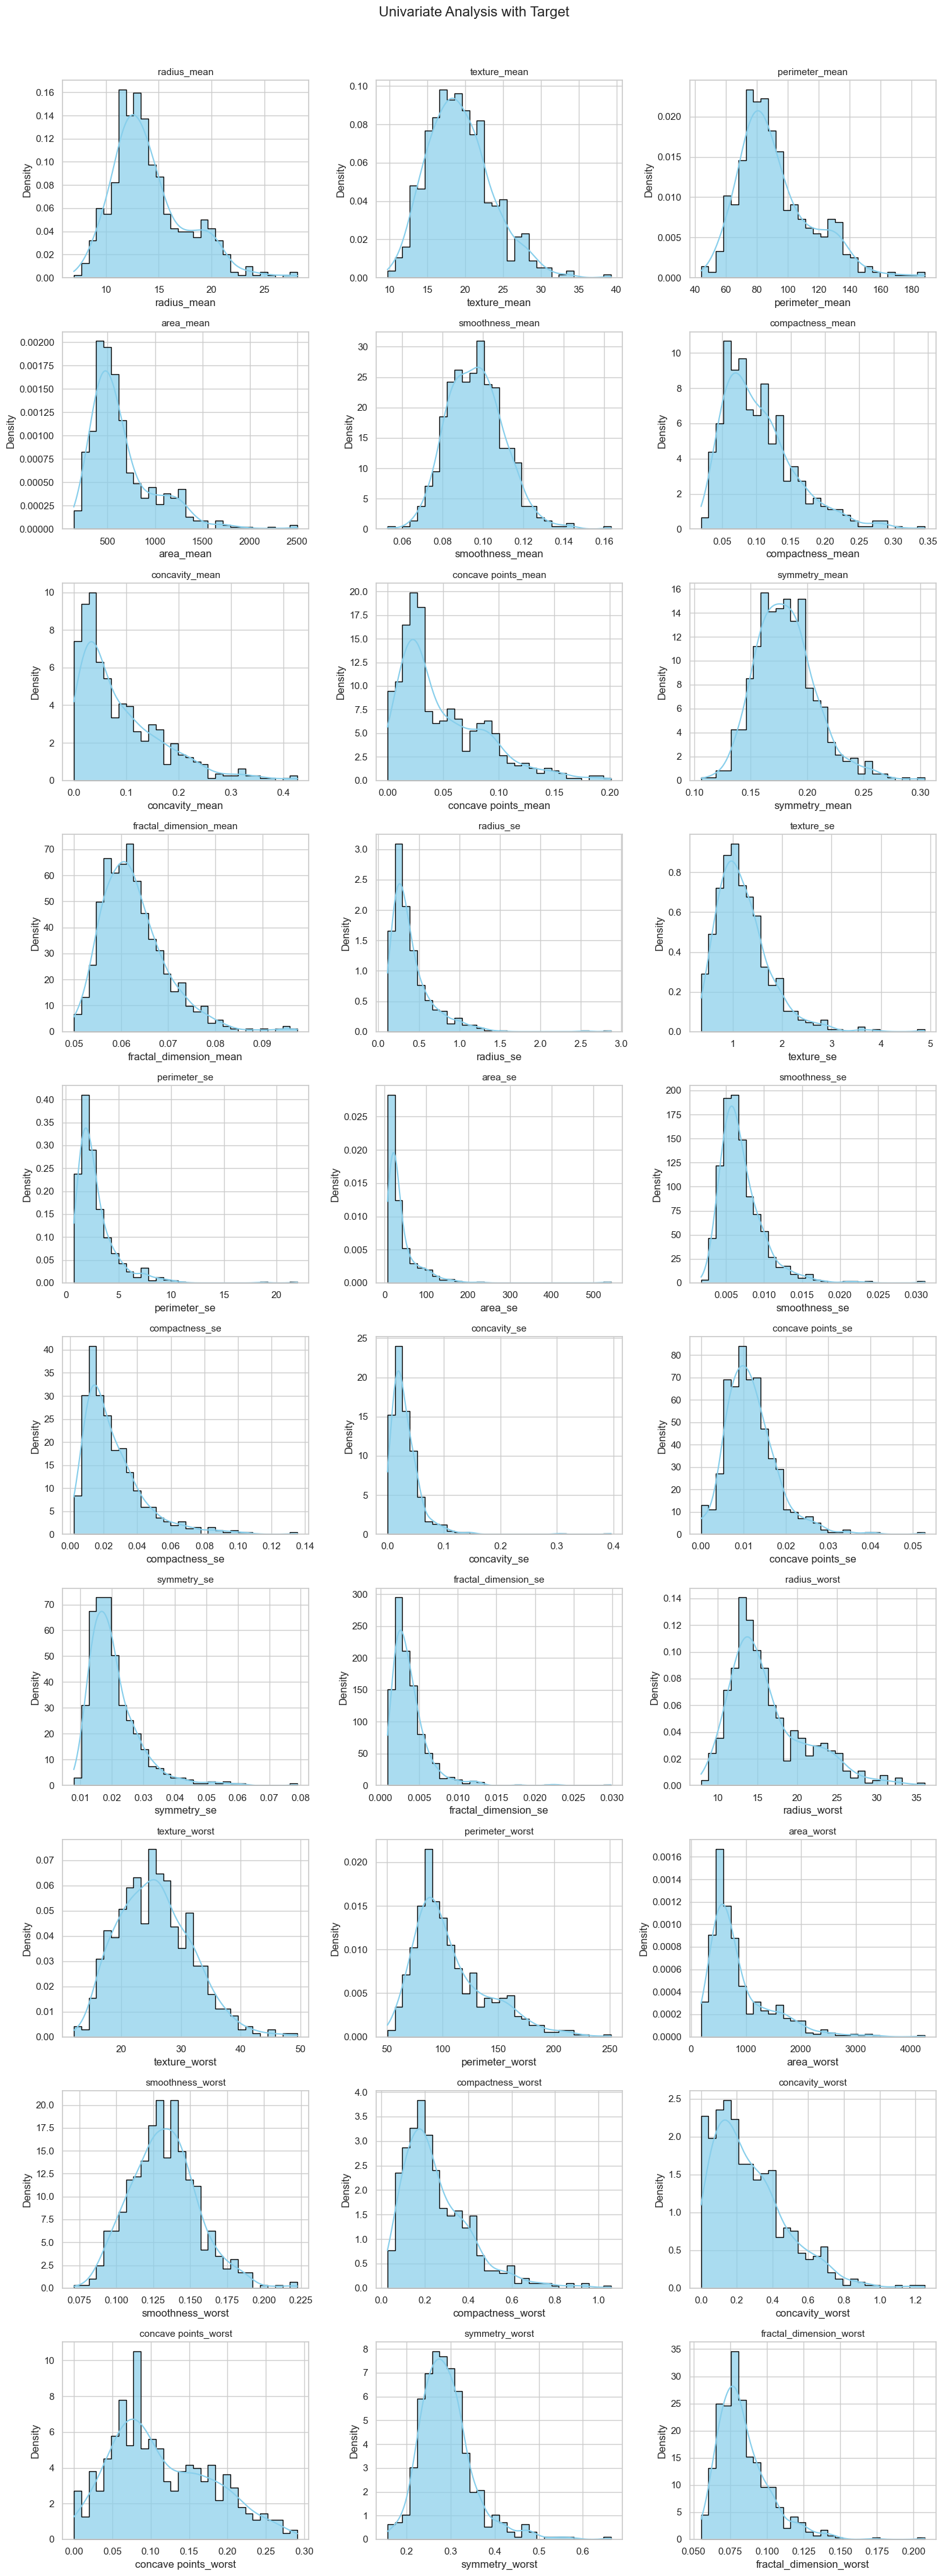

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# get all numeric columns
cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# dynamic grid size
n = len(cols)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

plt.figure(figsize=(5 * cols_per_row, 4 * rows))
sns.set_theme(style="whitegrid")

for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(df[col], kde=True, color="skyblue", bins=30, edgecolor='black', alpha=0.7, stat="density", element='step')
    plt.title(col, fontsize=11)

plt.tight_layout()
plt.suptitle('Univariate Analysis with Target', fontsize=16, y=1.02)
plt.show()

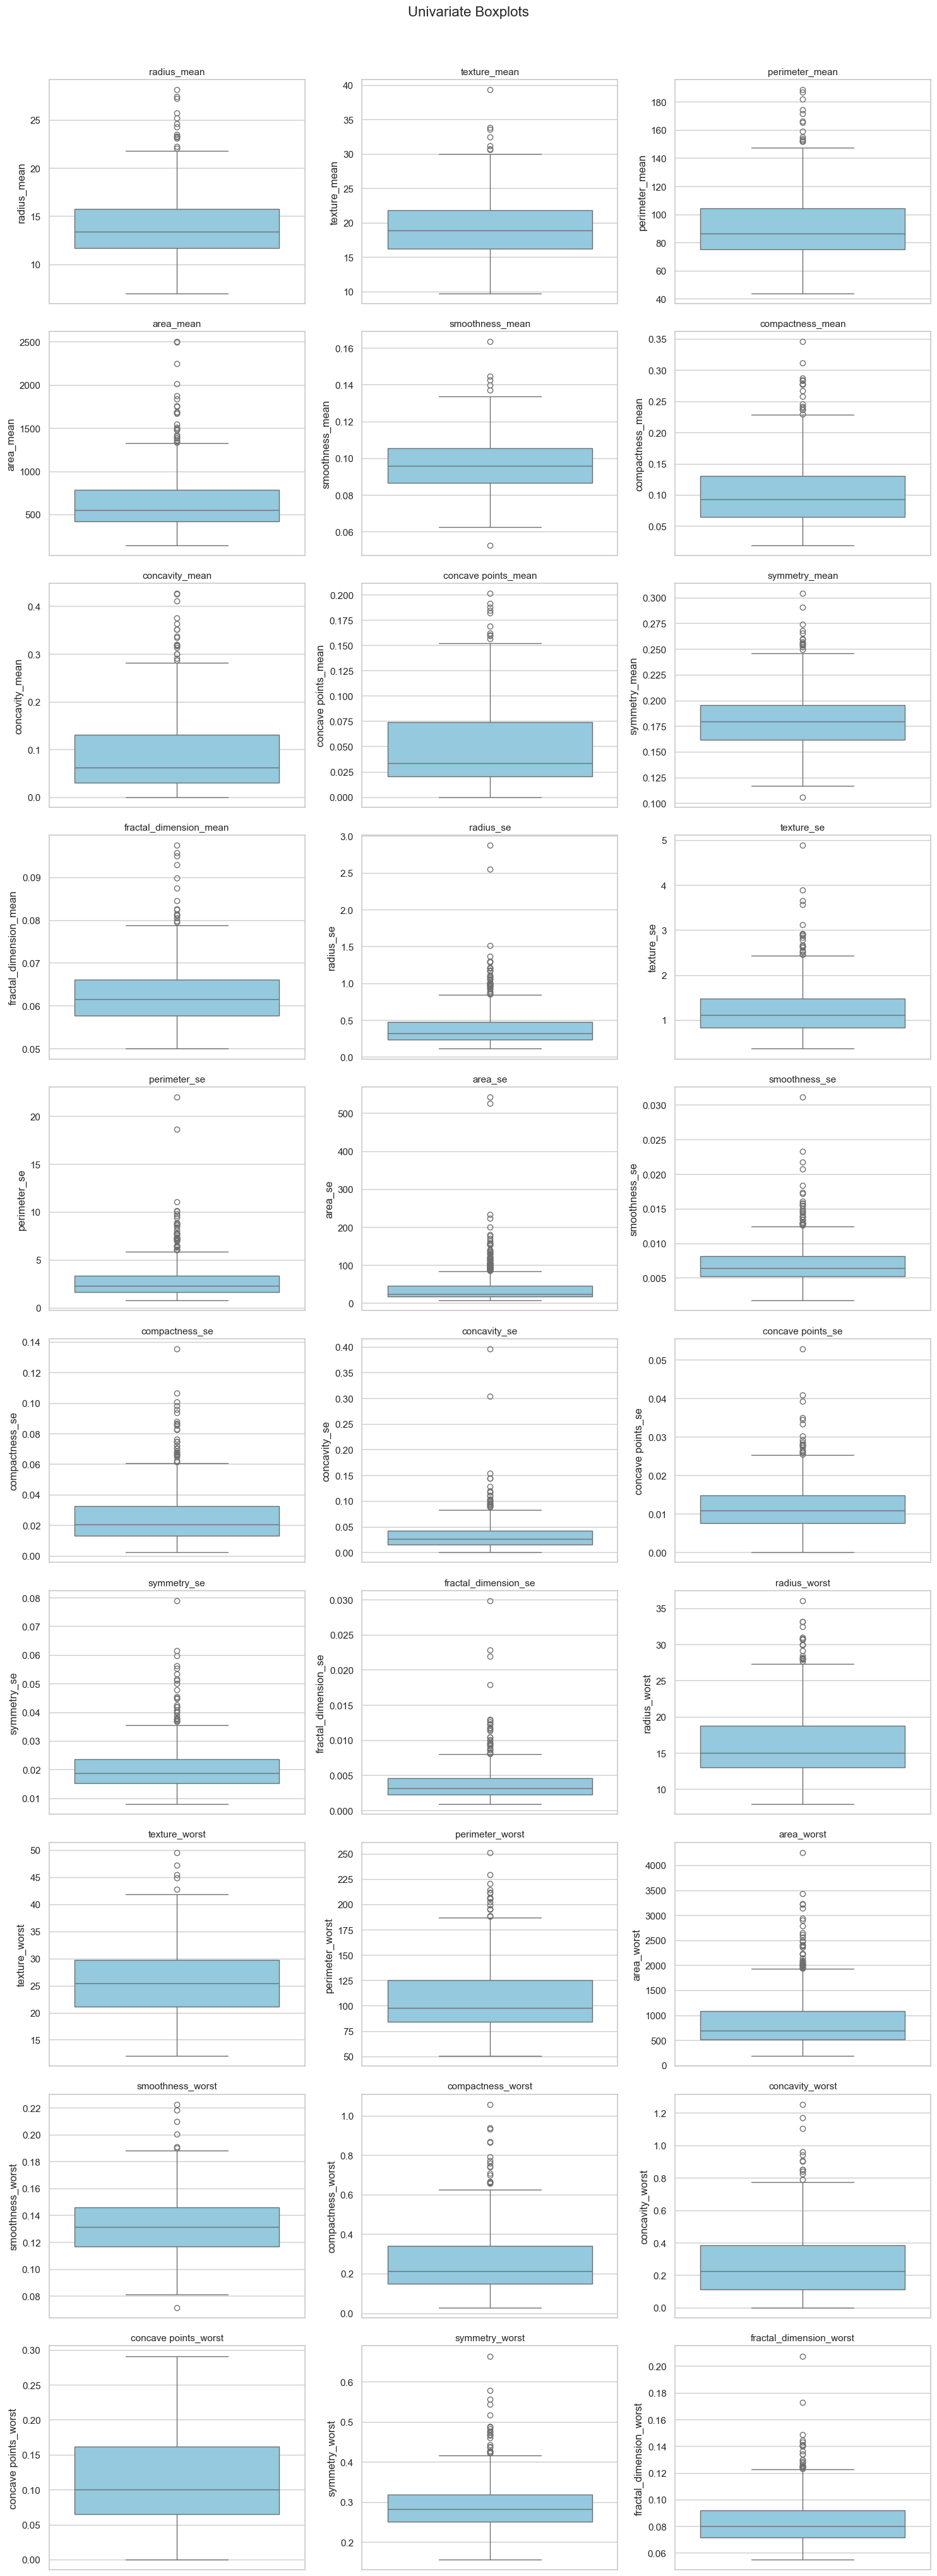

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

# Select numeric columns only (boxplot makes sense for numeric data)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Determine subplot grid size automatically
n = len(num_cols)
cols_per_row = 3  # number of plots per row
rows = math.ceil(n / cols_per_row)

# Create figure
plt.figure(figsize=(5 * cols_per_row, 4 * rows))
sns.set_theme(style="whitegrid")

# Loop through numeric columns and plot
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(y=df[col], color="skyblue", orient='v')
    plt.title(col, fontsize=11)
    plt.tight_layout()

plt.suptitle("Univariate Boxplots", fontsize=16, y=1.02)
plt.show()

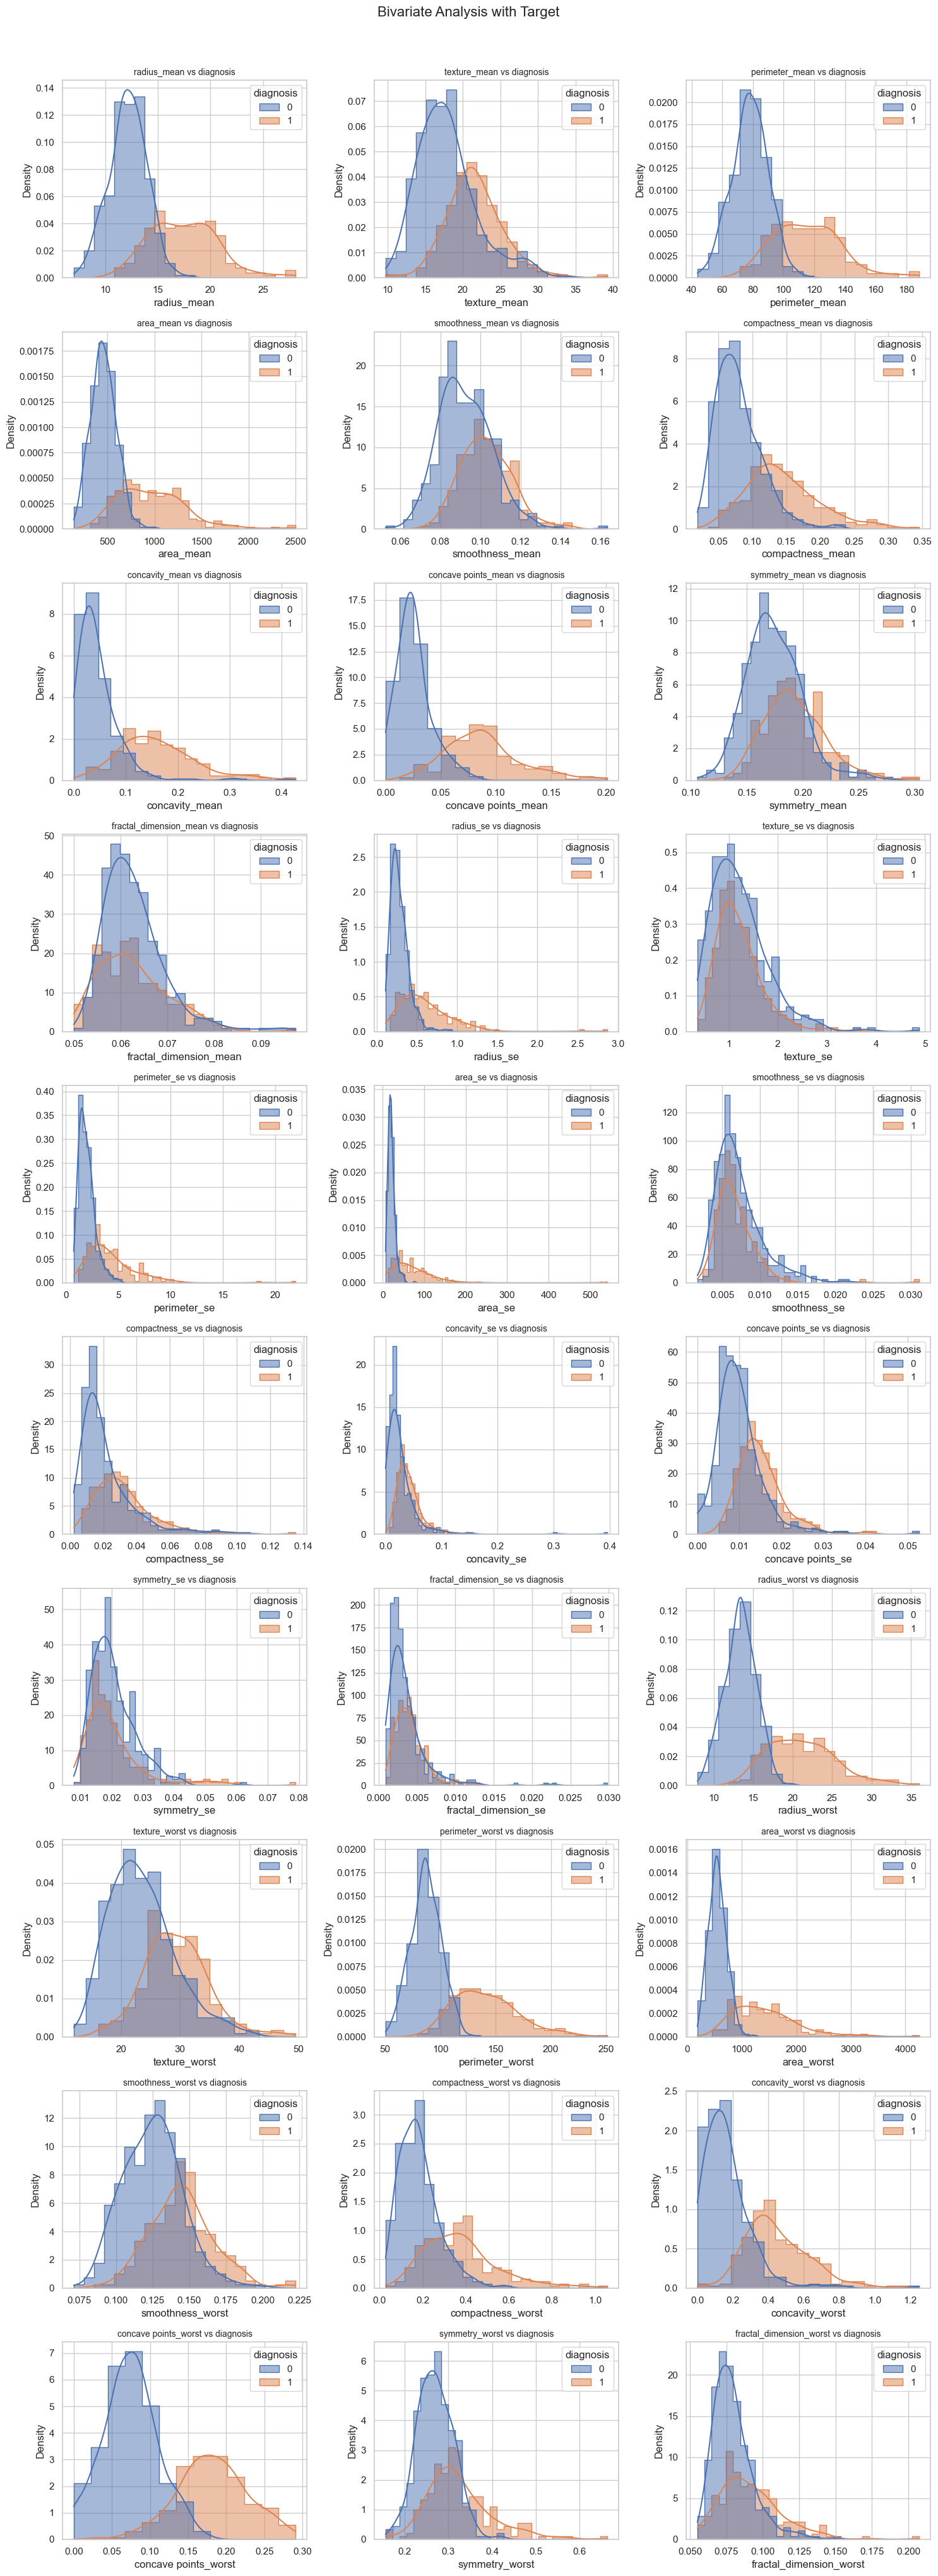

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

target = 'diagnosis'  # change this to your target column

# get all columns except target
cols = [col for col in df.columns if col != target]

# dynamic grid size
n = len(cols)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

plt.figure(figsize=(5 * cols_per_row, 4 * rows))
sns.set_theme(style="whitegrid")

for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(data=df, x=col, hue=target, kde=True, element="step", stat="density", alpha=0.5)
    plt.title(f'{col} vs {target}', fontsize=10)

plt.tight_layout()
plt.suptitle('Bivariate Analysis with Target', fontsize=16, y=1.02)
plt.show()

# preprocessing
* label encoder
* remove high corr
* handle skewed columns
* transformations

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['diagnosis'] = le.fit_transform(df['diagnosis'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [68]:
# columns skewed

from scipy.stats import skew

num_cols = df_clean_2.select_dtypes(include=['float64', 'int64']).columns
skewed_cols = df_clean_2[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_cols = skewed_cols[skewed_cols > 0.75].index
skewed_cols

Index(['concavity_se', 'fractal_dimension_se', 'smoothness_se', 'symmetry_se',
       'compactness_se', 'fractal_dimension_worst', 'compactness_worst',
       'concave points_se', 'symmetry_worst', 'radius_worst'],
      dtype='object')

In [69]:
X = df_clean_2.drop(columns=['diagnosis'])
y = df_clean_2['diagnosis']

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from scipy.stats import skew, boxcox, yeojohnson

columns = X_train.columns.tolist()
# pipeline for transformations

pipe = Pipeline(steps=[
  ('power', PowerTransformer(method = 'yeo-johnson')),
  ('scaler', StandardScaler())
  ])

preprocess = ColumnTransformer(transformers=[('num', pipe, columns)])

X_train_trans = preprocess.fit_transform(X_train)
X_test_trans = preprocess.transform(X_test)

In [72]:
x_train_df = pd.DataFrame(X_train_trans, columns=X.columns)

In [73]:
# df_clean_2.to_csv('cleaned_breast_canser.csv', index=False)

# modeling

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_trans, y_train)
model.score(X_test_trans, y_test)

0.9824561403508771

In [75]:
y_test.value_counts()

diagnosis
0    72
1    42
Name: count, dtype: int64

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'max_iter': [100, 200, 300, 400, 500]
}
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=20, scoring='accuracy', cv=5, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_trans, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_trans)

print("logistic Classifier Results:")
print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
logistic Classifier Results:
Best Parameters: {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 500, 'C': 1}
Accuracy: 0.9824561403508771
Confusion Matrix:
 [[72  0]
 [ 2 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



c:\Users\Samer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
65 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Samer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Samer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Samer\AppDa

In [79]:
import joblib

joblib.dump(preprocess, 'preprocess.pkl')
joblib.dump(best_model, 'model.pkl')

# save columns name
joblib.dump(X.columns.tolist(), "X_columns.pkl")

# save stats col
X_stats = {
    col: {
        "min": X[col].min(),
        "max": X[col].max(),
        "mean": X[col].mean()
    }
    for col in X.columns
}
joblib.dump(X_stats, "X_stats.pkl")

print("✅ Saved X_columns.pkl and X_stats.pkl successfully!")

✅ Saved X_columns.pkl and X_stats.pkl successfully!
